In [100]:
## Juan 
# Physics 157 - Signal Processing

In [101]:
# ------- IMPORTS --------
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
# ------------------------ 

# For aesthetic plots
def science_plot(fontsize = 9):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

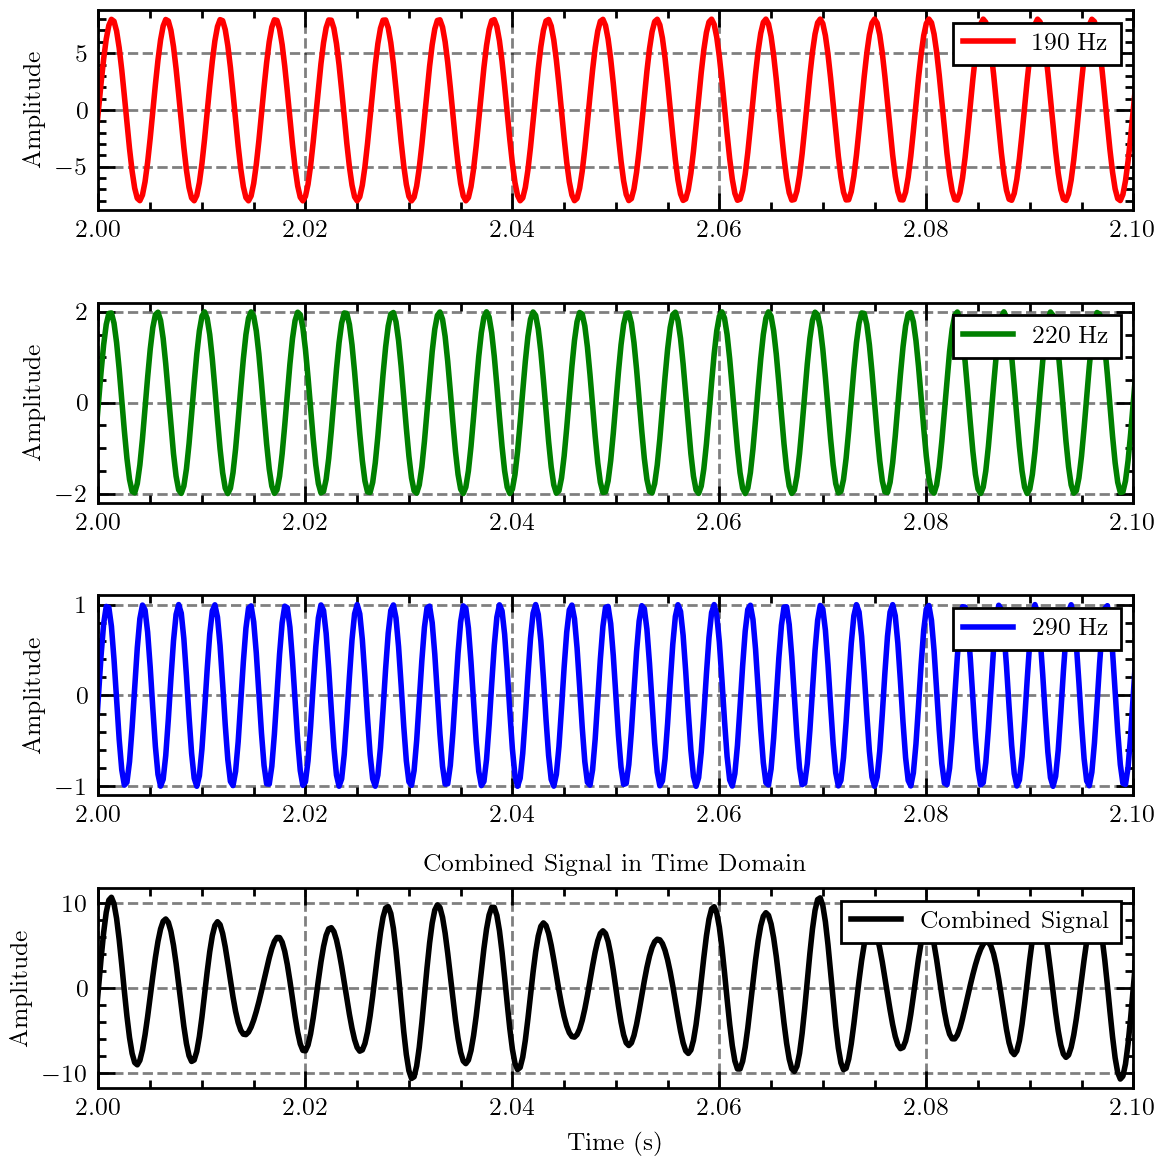

In [102]:
## ===== MAKING DATA ===== ##
fs = 4000  # Sampling frequency
T = 5  # Duration of the signal in seconds
time = np.arange(0,T, 1/fs )  # Generate time values from 0 to T with step size 1/fs

# Define three sine waves using the formula A * sin(2πft), set A=1
f1, f2, f3 = 190, 220, 290  # Frequencies
sine1 = 8 * np.sin(2*np.pi*f1*time)  # First sine wave
sine2 = 2 * np.sin(2*np.pi*f2*time)  # Second sine wave
sine3 = 1 * np.sin(2*np.pi*f3*time)  # Third sine wave

data = sine1 + sine2 + sine3  # Combine the three sine waves

dpiv = 200
fig, axes = plt.subplots(4,  figsize=(6, 6), dpi = dpiv) #4 rows, 1 column, shared x-axis

# Plot individual sine waves
axes[0].plot(time, sine1, label=f'{f1} Hz', color='r')
axes[1].plot(time, sine2, label=f'{f2} Hz', color='g')
axes[2].plot(time, sine3, label=f'{f3} Hz', color='b')
#...

# Plot the combined signal
axes[3].plot(time, data, label='Combined Signal', color='k')

# Formatting
for ax in axes:
    ax.set_xlim(2, 2.1)
    ax.legend(loc = 'upper right')
    ax.set_ylabel('Amplitude')

axes[3].set_xlabel('Time (s)')
axes[3].set_title('Combined Signal in Time Domain')

plt.tight_layout()
plt.show()


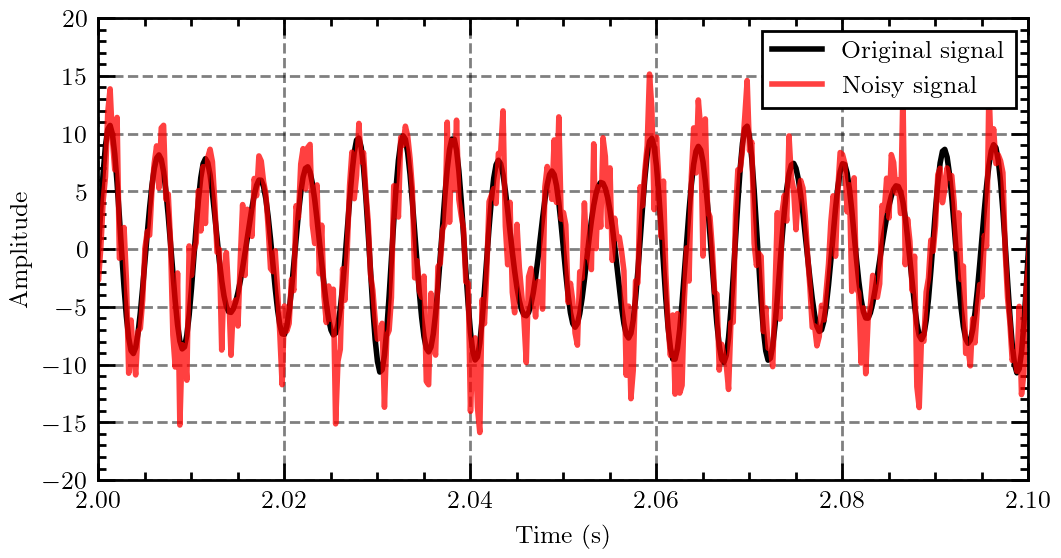

In [103]:
## ====== MAKING NOISY DATA ====== ##
# Define noise parameters
mean = 0
std_dev = 3

# Generate noise and add to the signal
noise = np.random.normal(
    loc = mean,
    scale = std_dev,
    size = len(time)
)            #Generate random number from a Gaussian distribution with mean 0 and std 2
             #Size is the same as time
noisy_data = data + noise #Combine data and noise

# Plot original and noisy signals
plt.figure(figsize=(6, 3), dpi = dpiv)
plt.plot(time, data,       label='Original signal', color='k', alpha=1) #original
plt.plot(time, noisy_data, label='Noisy signal'   ,  color='r', alpha=0.75) #Noisy

# Formatting
plt.xlim(2, 2.1)  # Zoom in on the time range
plt.ylim(-20,20)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc = 'upper right')

plt.show()

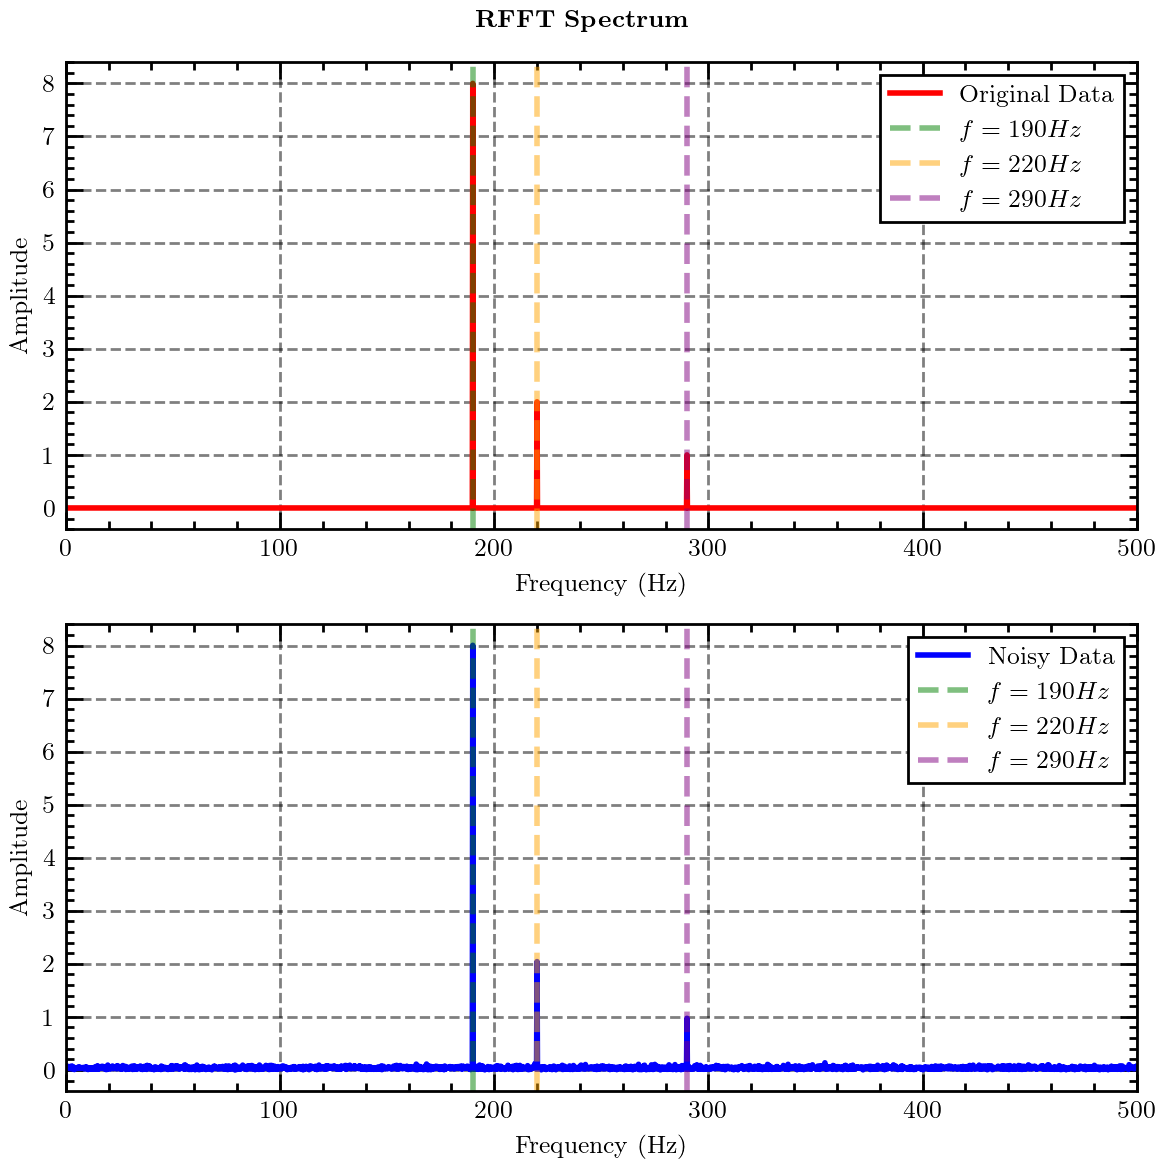

In [104]:
## ===== FFT THE MOTHERFUCKER ===== ##
amps  = np.fft.rfft(data)/(len(data)/2)
freqs = np.fft.rfftfreq(len(data), 1/fs)
amps_noisy = np.fft.rfft(noisy_data)/(len(noisy_data)/2)
freqs_noisy = np.fft.rfftfreq(len(noisy_data), 1/fs)

fig, axes = plt.subplots(2,  figsize=(6, 6), dpi = dpiv)


# Plot individual sine waves
axes[0].plot(freqs, np.abs(amps), label=f'Original Data', color='r')
axes[1].plot(freqs_noisy, np.abs(amps_noisy), label=f'Noisy Data', color='b')

for ax in axes:
    ax.axvline(f1, label = f'$f = {f1} Hz$', color = 'g'     , alpha = 0.5, linestyle = '--')
    ax.axvline(f2, label = f'$f = {f2} Hz$', color = 'orange', alpha = 0.5, linestyle = '--')
    ax.axvline(f3, label = f'$f = {f3} Hz$', color = 'purple', alpha = 0.5, linestyle = '--')
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Amplitude")
    ax.set_xlim(0, 500)
    ax.legend(loc = 'upper right')
plt.suptitle(r"\textbf{RFFT Spectrum}")
plt.tight_layout()
plt.show()

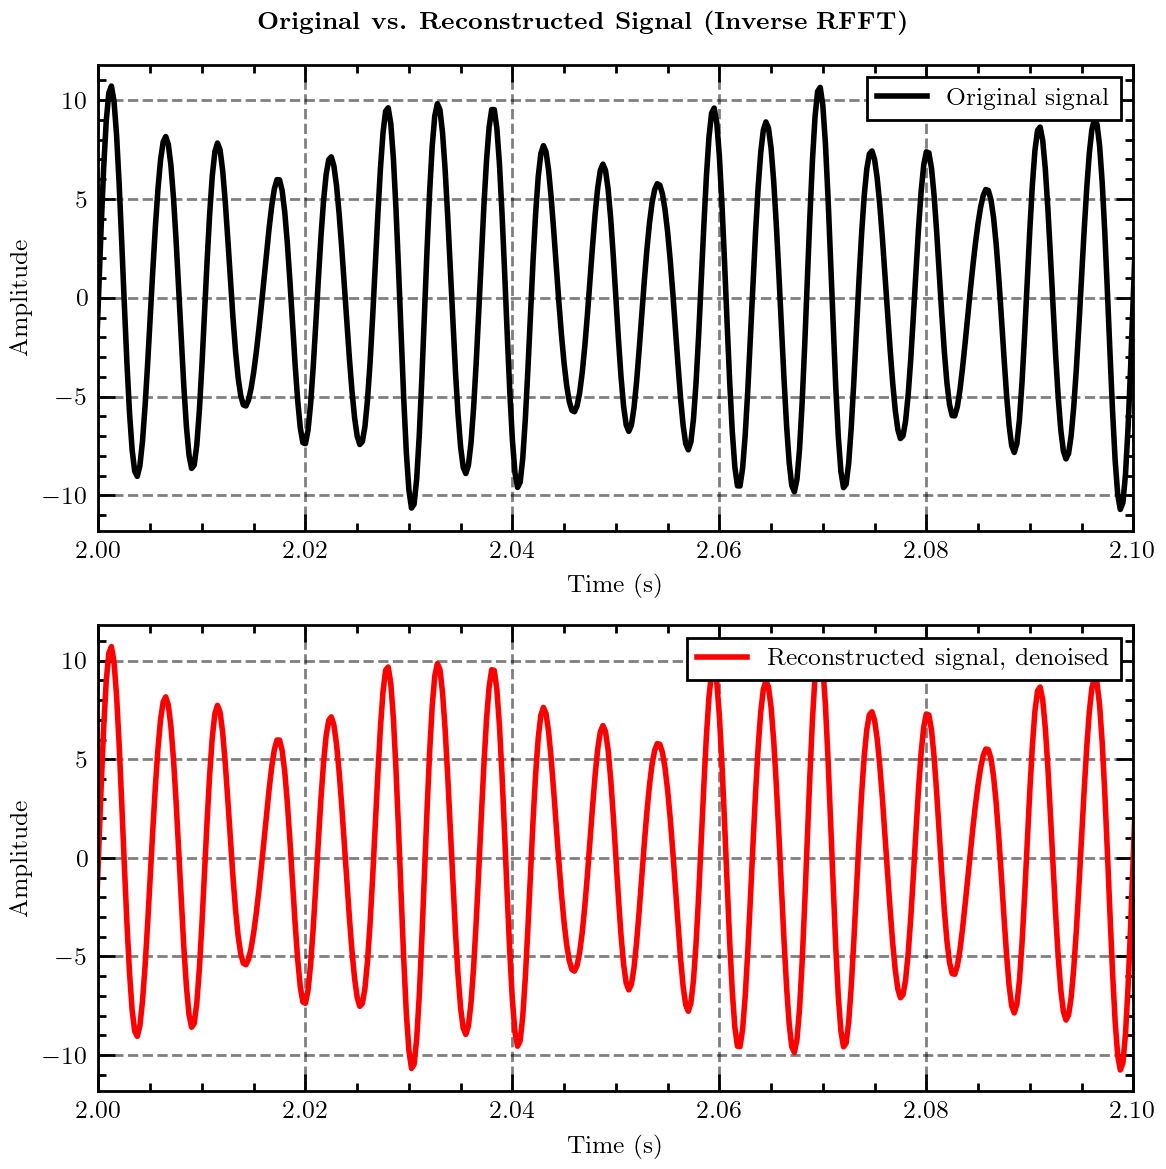

In [105]:
## ==== DENOISING ===== #
# cuts off small amplitudes with a given threshold
min_amp = 0.5
denoised_data_amps = np.where(np.abs(amps_noisy) > min_amp, amps_noisy, 0)

## ===== INVERSING ===== #
reconstructed_data = np.fft.irfft(denoised_data_amps, n=len(data))*(len(amps_noisy))

## PLOTTING RECONSTRUCTION
figs, axes = plt.subplots(2, figsize=(6, 6), dpi = dpiv)
axes[0].plot(time, data              , color = 'k', label = 'Original signal')
axes[1].plot(time, reconstructed_data, color = 'r', label = 'Reconstructed signal, denoised')
# Plot original and reconstructed signals
for ax in axes:
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude")
    ax.set_xlim(2, 2.1)
    ax.legend(loc = 'upper right')

plt.suptitle(r"\textbf{Original vs. Reconstructed Signal (Inverse RFFT)}")
plt.tight_layout()
plt.show()

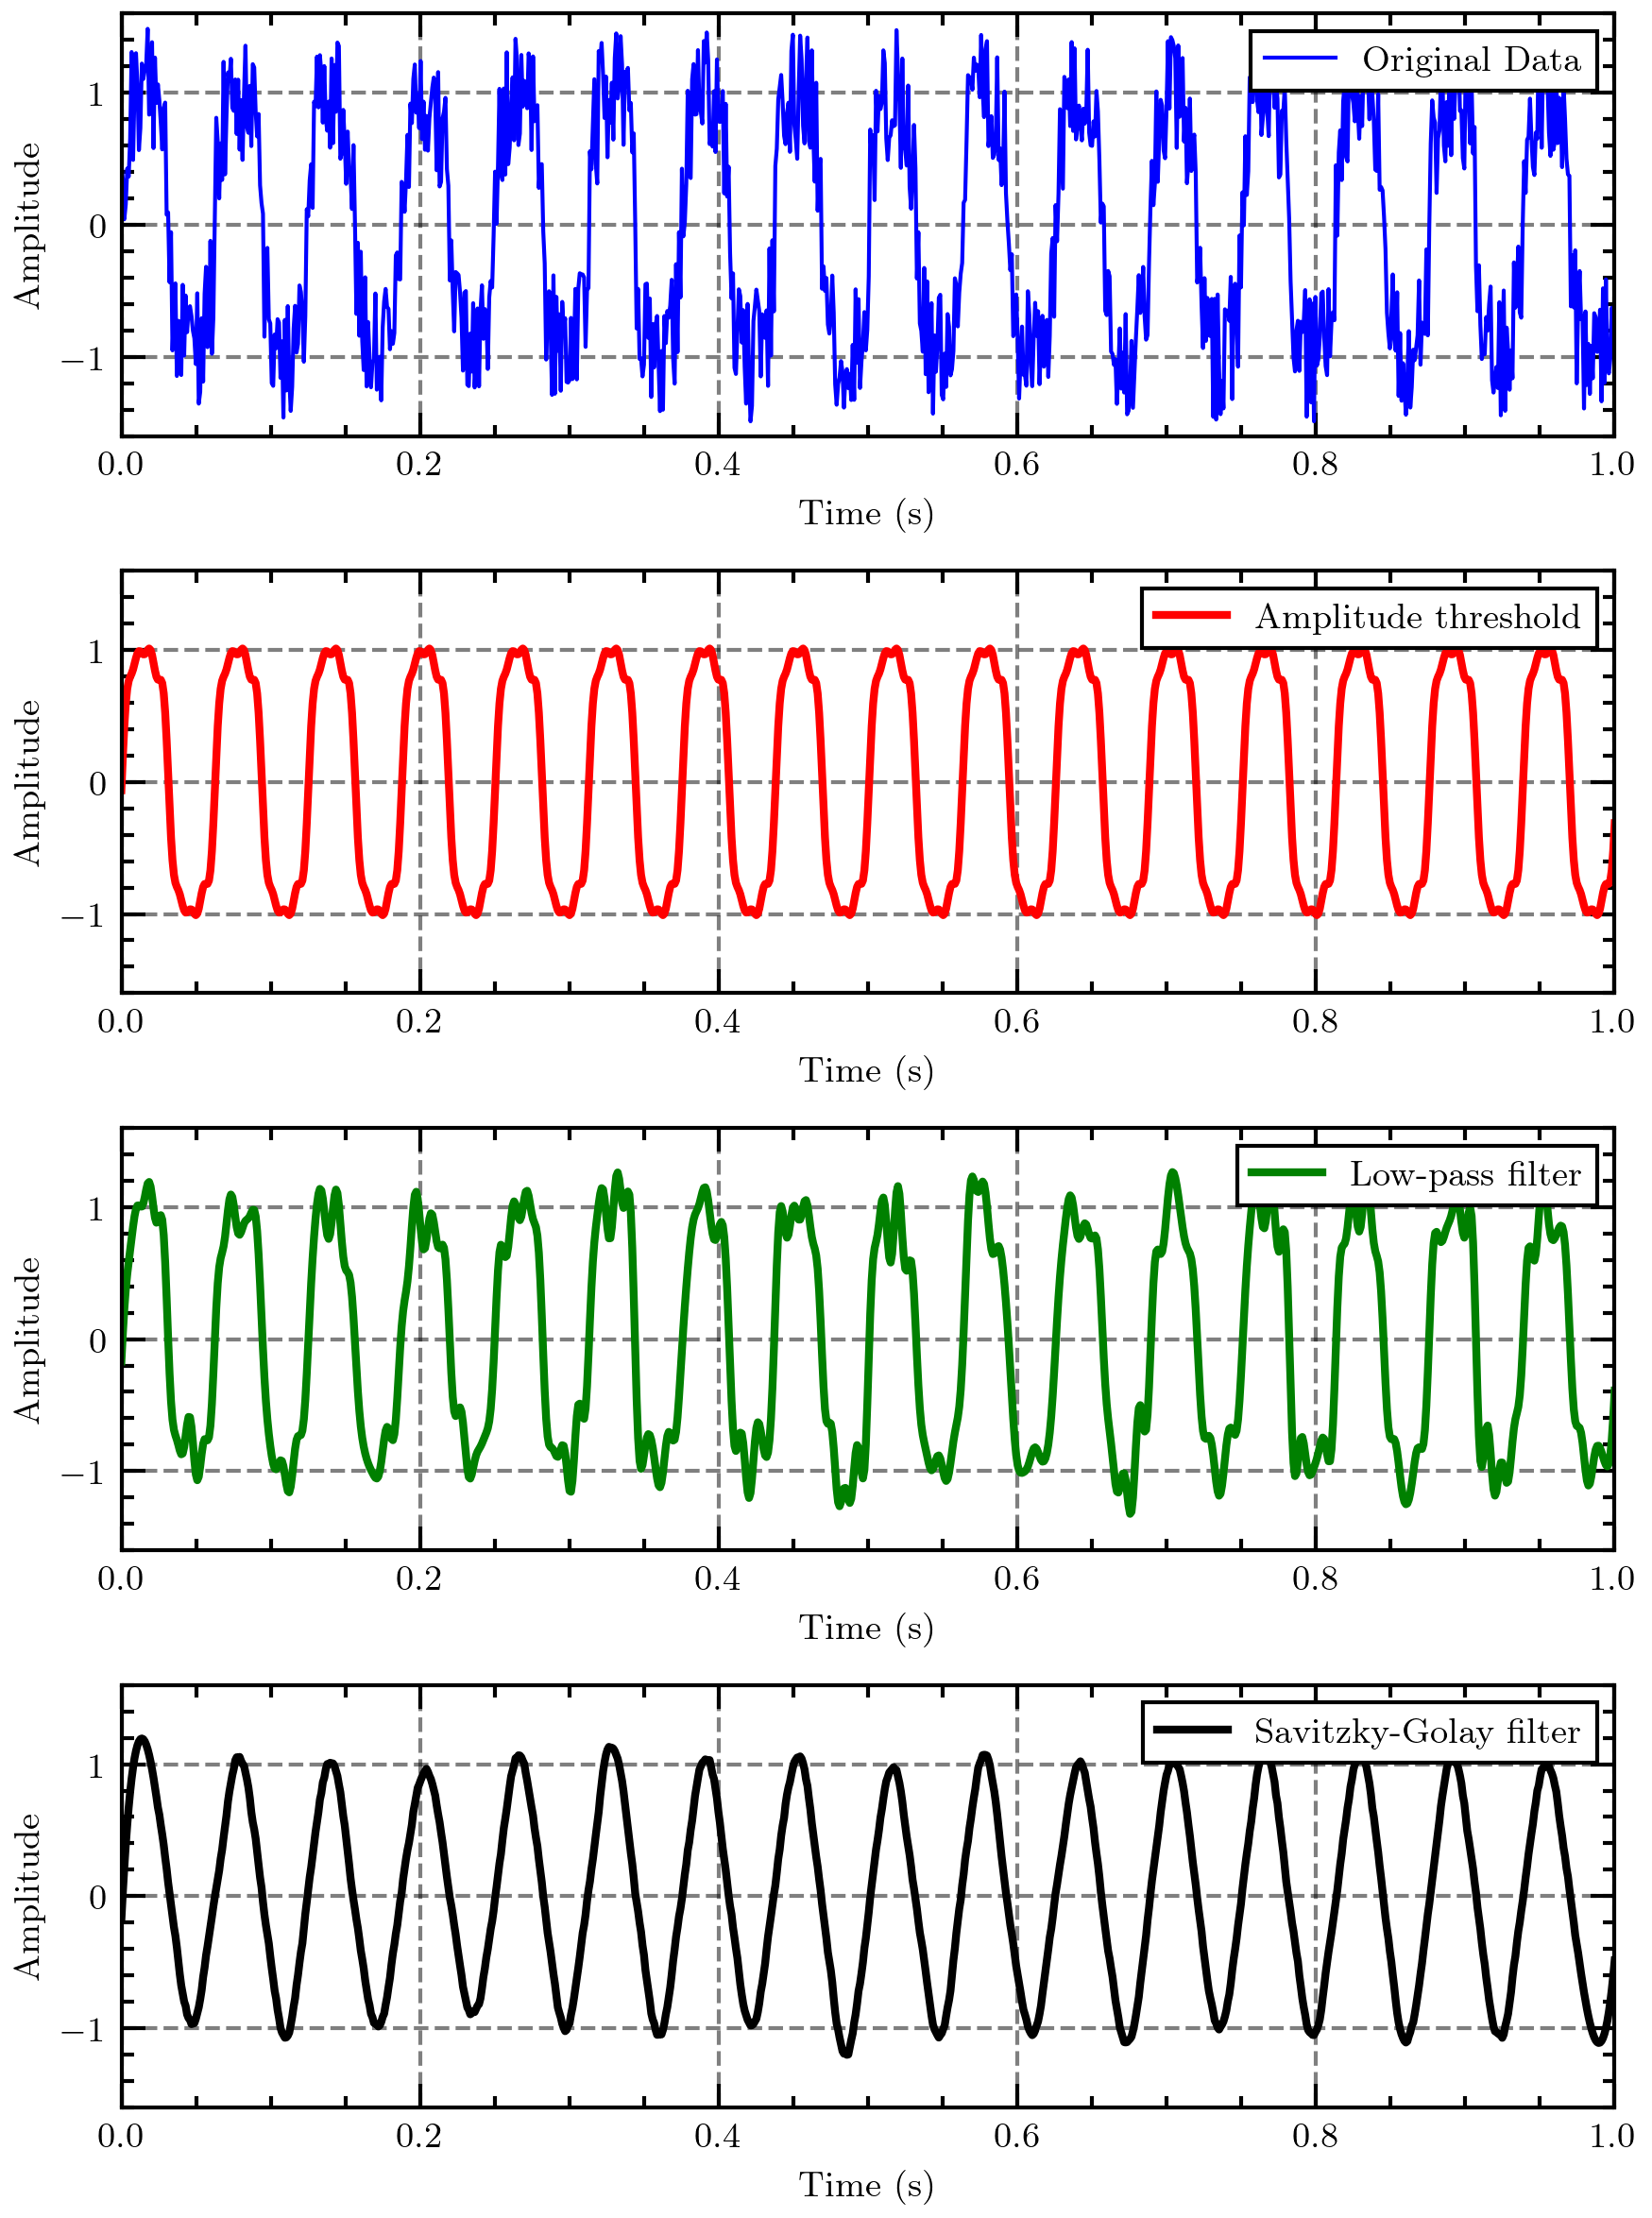

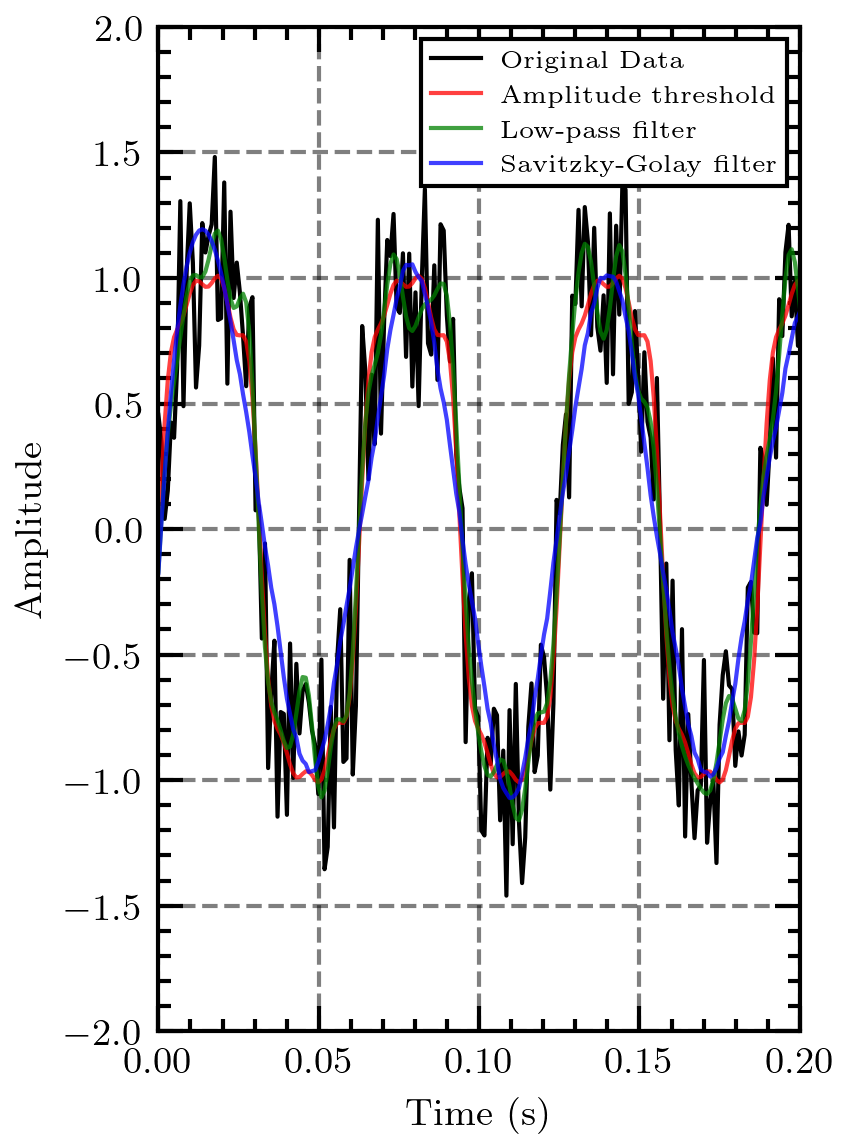

In [149]:
# EMBEDDED NOISE, ACTUAL DATA
data = np.loadtxt("https://websites.umich.edu/~mejn/cp/data/pitch.txt")
time = np.linspace(0, 1, len(data)) # assume data is a one-second sample

# plt.plot(time, data, color = 'b', linewidth = 1)
# plt.show()
## FFT THE FUCKER
amps  = np.fft.rfft(data)/(len(data)/2)
freqs = np.fft.rfftfreq(len(data), 1/len(data))
# plt.plot(freqs, np.abs(amps))
# plt.show()

## MINIMUM AMPLITUDE
min_amp = 0.05
denoised_amps_thresholdamp= np.where(np.abs(amps) > min_amp, amps, 0)
# plt.plot(freqs, np.abs(denoised_amps_thresholdamp))
# plt.show()

reconstructed_data_thresholdamp = np.fft.irfft(denoised_amps_thresholdamp, n=len(data))*(len(denoised_amps_thresholdamp))
# plt.plot(time, reconstructed_data_thresholdamp, color = 'r')
# plt.show()

## LOW PASS FILTER
max_freq = 120
denoised_amps_lowpass = np.where(freqs < max_freq, amps, 0)
# plt.plot(freqs, np.abs(denoised_amps_lowpass))
# plt.show()

reconstructed_data_lowpass = np.fft.irfft(denoised_amps_lowpass , n=len(data))*(len(denoised_amps_lowpass))
# plt.plot(time, reconstructed_data_thresholdamp, color = 'r')
# plt.show()

## SAVITZKY - GOLAY
from scipy.signal import savgol_filter
# Apply Savitzky-Golay filter
window_length = 51  # Must be odd
polyorder = 3       # Polynomial order
smoothed_data = savgol_filter(data, window_length, polyorder)
# Plot original vs smoothed data
# plt.plot(time, smoothed_data, color='r', linewidth=2)
# plt.legend()
# plt.show()

fig, axes = plt.subplots(4, figsize=(6, 8), dpi = 300)
axes[0].plot(time, data, color = 'b', linewidth = 1, label = 'Original Data')
axes[1].plot(time, reconstructed_data_thresholdamp, color = 'r', label = 'Amplitude threshold')
axes[2].plot(time, reconstructed_data_lowpass, color = 'g', label = 'Low-pass filter')
axes[3].plot(time, smoothed_data, color='k', label = 'Savitzky-Golay filter')

for ax in axes:
    ax.set_xlim(0,1)
    ax.set_ylim(-1.6,1.6)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize = (3,4), dpi = 300)
plt.plot(time, data, color = 'k', linewidth = 1, label = 'Original Data')
plt.plot(time, reconstructed_data_thresholdamp, color = 'r', label = 'Amplitude threshold', alpha = 0.75, linewidth = 1)
plt.plot(time, reconstructed_data_lowpass, color = 'g', label = 'Low-pass filter', alpha = 0.75, linewidth = 1)
plt.plot(time, smoothed_data, color='b', label = 'Savitzky-Golay filter', alpha = 0.75, linewidth = 1)
plt.xlim(0,0.2)
plt.ylim(-2,2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right', prop={'size': 6})
plt.tight_layout()
plt.show()



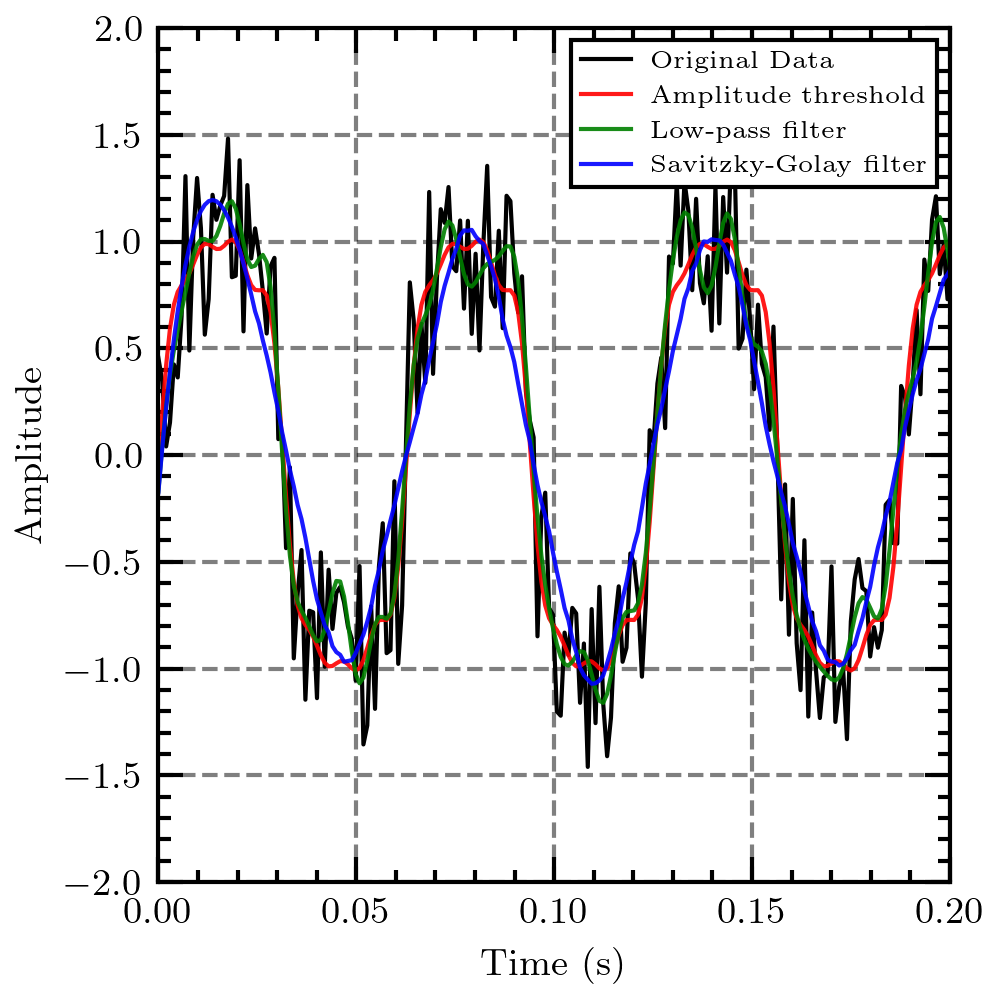

In [155]:
# EMBEDDED NOISE, ACTUAL DATA
data = np.loadtxt("https://websites.umich.edu/~mejn/cp/data/pitch.txt")
time = np.linspace(0, 1, len(data)) # assume data is a one-second sample
# FFT the thing
amps  = np.fft.rfft(data)/(len(data)/2)
freqs = np.fft.rfftfreq(len(data), 1/len(data))
# Minimum amplitude threshold
min_amp = 0.05
denoised_amps_thresholdamp= np.where(
    np.abs(amps) > min_amp, 
    amps, 
    0
)
reconstructed_data_thresholdamp = np.fft.irfft(
                                    denoised_amps_thresholdamp, 
                                    n=len(data))*(len(denoised_amps_thresholdamp)
                                )
# Low pass filtering
max_freq = 120
denoised_amps_lowpass = np.where(freqs < max_freq, amps, 0)
reconstructed_data_lowpass = np.fft.irfft(
                                        denoised_amps_lowpass , 
                                        n=len(data)
                                    ) * (len(denoised_amps_lowpass))
## Savitzky-Golay filter
from scipy.signal import savgol_filter
window_length = 51  # Must be odd
polyorder = 3       # Polynomial order
smoothed_data = savgol_filter(data, window_length, polyorder)

# Plotting
plt.figure(figsize = (3.5,3.5), dpi = 300)
plt.plot(time, data, color = 'k', linewidth = 1, label = 'Original Data')
plt.plot(time, reconstructed_data_thresholdamp, color = 'r', label = 'Amplitude threshold', alpha = 0.9, linewidth = 1)
plt.plot(time, reconstructed_data_lowpass, color = 'g', label = 'Low-pass filter', alpha = 0.9, linewidth = 1)
plt.plot(time, smoothed_data, color='b', label = 'Savitzky-Golay filter', alpha = 0.9, linewidth = 1)
plt.xlim(0,0.2)
plt.ylim(-2,2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right', prop={'size': 6})
plt.tight_layout()
plt.show()

